In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%load_ext version_information
%version_information numpy, dlib, matplotlib, imageio, gaze, torch, torchvision

Software,Version
Python,3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.2)]
IPython,7.0.1
OS,Darwin 17.7.0 x86_64 i386 64bit
numpy,1.15.3
dlib,19.16.0
matplotlib,3.0.0
imageio,2.4.1
gaze,The 'gaze' distribution was not found and is required by the application
torch,0.4.1
torchvision,0.2.1


In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

## running the model

In [4]:
from gaze import init
args = init(no_cuda=True, verbose=1)
print('Parameters=', args)

Parameters= {'dataset_folder': 'dataset', 'dataset_faces_folder': 'dataset_faces', 'batch_size': 16, 'test_batch_size': 8, 'size_test_set': 0.2, 'epochs': 40, 'do_adam': False, 'lr': 0.01, 'momentum': 0.05, 'no_cuda': True, 'num_processes': 1, 'seed': 42, 'log_interval': 0, 'fullsize': 75, 'crop': 75, 'size': 40, 'mean': 0.4, 'std': 0.3, 'conv1_dim': 9, 'conv1_kernel_size': 8, 'conv2_dim': 36, 'conv2_kernel_size': 12, 'conv1_bn_momentum': 0.5, 'conv2_bn_momentum': 0.5, 'dense_bn_momentum': 0.5, 'stride1': 2, 'stride2': 4, 'N_cv': 20, 'dimension': 30, 'verbose': 1}


In [5]:
from gaze import Data
d = Data(args)
d.dataset.classes

Found 2443 sample images;  1955  to train 488 to test


['blink', 'center', 'left', 'right']

In [6]:
targets = {}
s_target = '🔴'
s_fixat = '🔵'
s_distra = '🌫'
s_blink = '☠️'

N_dis = 30 # <<<<<<<<<<<< change to adapt to your notebook's width
N_margin = 2

targets['left'] = N_margin * s_distra + s_target + 2 * N_dis * s_distra + N_margin * s_distra

targets['blink'] = N_margin * s_distra + N_dis * s_distra + s_blink + N_dis * s_distra + N_margin * s_distra

targets['center'] = N_margin * s_distra + N_dis * s_distra + s_target + N_dis * s_distra + N_margin * s_distra

targets['right'] = N_margin * s_distra + 2 * N_dis * s_distra + s_target + N_margin * s_distra

print ('Empty line')
null = N_margin * s_distra +  (2 * N_dis + 1) * s_distra + N_margin * s_distra
print (null)
print ('Fixation dot')
center = N_margin * s_distra + N_dis * s_distra + s_fixat + N_dis * s_distra + N_margin * s_distra
print (center)

for label in targets.keys():
    print('label=', label)
    print (targets[label])

Empty line
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Fixation dot
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔵🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= left
🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= blink
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫☠️🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= center
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
label= right
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫


In [7]:
from IPython.display import clear_output

# dynamical test : loading network

In [8]:
import numpy as np
from LeCheapEyeTracker.EyeTrackerServer import Server
#from LeCheapEyeTracker.EyeTrackerClient import Client


In [9]:
from gaze import ML
ml = ML(args)

Found 2443 sample images;  1955  to train 488 to test


In [10]:
path = '_Regard_400.pt'

In [11]:
path = '_Regard.pt'

In [12]:
ml.train(path=path)

Loading file _Regard.pt


# dynamical test : online detection

In [13]:
def dyn_test(N_frame=32, lambda_dlib=.9, startup_time=1., interframe_time=0., display=False):
    try:
        from gaze import FaceExtractor
        F = FaceExtractor()

        import time
        time.sleep(startup_time)
        et = Server()
        timings_cv = []
        timings_dlib = []
        timings_torch = []
        bbox = None
        for i in range(N_frame):            

            t0 = time.time()
            try:
                t0 = time.time()
                frame = et.cam.grab()[:, :, ::-1]
                t1 = time.time()
                timings_cv.append(t1-t0)
                if np.random.rand()>lambda_dlib:
                    t0 = time.time()
                    bbox = F.get_bbox(frame)
                    t1 = time.time()
                timings_dlib.append(t1-t0)
                img_face = F.face_extractor(frame, bbox=bbox)
                t0 = time.time()
                pred = ml.classify(img_face, ml.dataset.test_transform)
                t1 = time.time()
                timings_torch.append(t1-t0)
                label = ml.dataset.dataset.classes[pred.argmax()]
                if display:
                    plt.imshow(img_face)
                    plt.show() 
                    print('Prediction =', label)
                else:
                    clear_output()
                    print(null)
                    print(null)
                    print(targets[label])
                    print(null)
                    print(null)                    

                print('Elapsed time =', '%0.3f' % ((time.time()-t0)*1000), 'ms')
                    
            except Exception as e:
                print(e)
            time.sleep(interframe_time)
            
    finally:
        et.close()
        
    for timings, label in [(timings_cv, 'openCV'), (timings_dlib, 'Dlib'), (timings_torch, 'torch')] :
        timings = np.array(timings)*1000
        print('For', label, ', timings in ms =', timings.mean(), '+/-', timings.std()) 
        
dyn_test(display=False, interframe_time=1.)        

🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🔴🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫🌫
Elapsed time = 5.998 ms
Capture released
For openCV , timings in ms = 14.77774977684021 +/- 6.641395485716009
For Dlib , timings in ms = 31.390532851219177 +/- 44.00972431227262
For torch , timings in ms = 5.043208599090576 +/- 0.35149454357920357


In [14]:
dyn_test(N_frame=8, display=False, interframe_time=0.)









Capture released
For openCV , timings in ms = 18.13182234764099 +/- 5.62090710949039
For Dlib , timings in ms = 20.46823501586914 +/- 4.501622563509028
For torch , timings in ms = nan +/- nan


/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:55: RuntimeWarning: Mean of empty slice.
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:110: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/usr/local/lib/python3.6/site-packages/numpy/core/_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


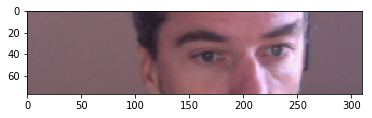

Prediction = center
Elapsed time = 200.124 ms


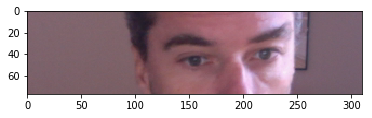

Prediction = center
Elapsed time = 199.072 ms


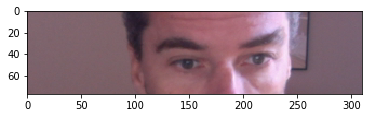

Prediction = center
Elapsed time = 198.846 ms


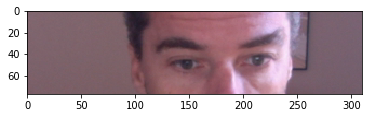

Prediction = right
Elapsed time = 206.687 ms


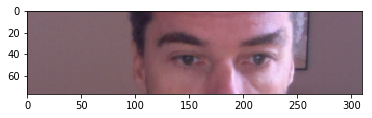

Prediction = center
Elapsed time = 211.802 ms


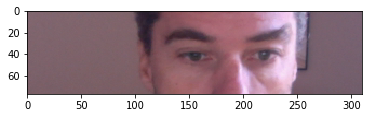

Prediction = right
Elapsed time = 207.307 ms


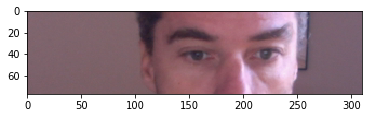

Prediction = right
Elapsed time = 197.666 ms


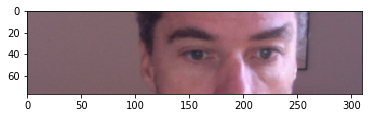

Prediction = right
Elapsed time = 209.219 ms
Capture released
For openCV , timings in ms = 15.82673192024231 +/- 9.746715379458204
For Dlib , timings in ms = 53.46137285232544 +/- 57.46320833827713
For torch , timings in ms = 4.1981041431427 +/- 0.24319073255428927


In [15]:
dyn_test(N_frame=8, display=True, interframe_time=0.)